In [91]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import iqr


In [93]:
df=pd.read_excel("Rotten_Tomatoes_Movies3.xls")

In [95]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [99]:
df.drop('critics_consensus',inplace=True,axis=1)

In [101]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [103]:
df.isnull().sum()

movie_title           0
movie_info            0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

In [105]:
df

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,2007-09-02,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0


# EDA

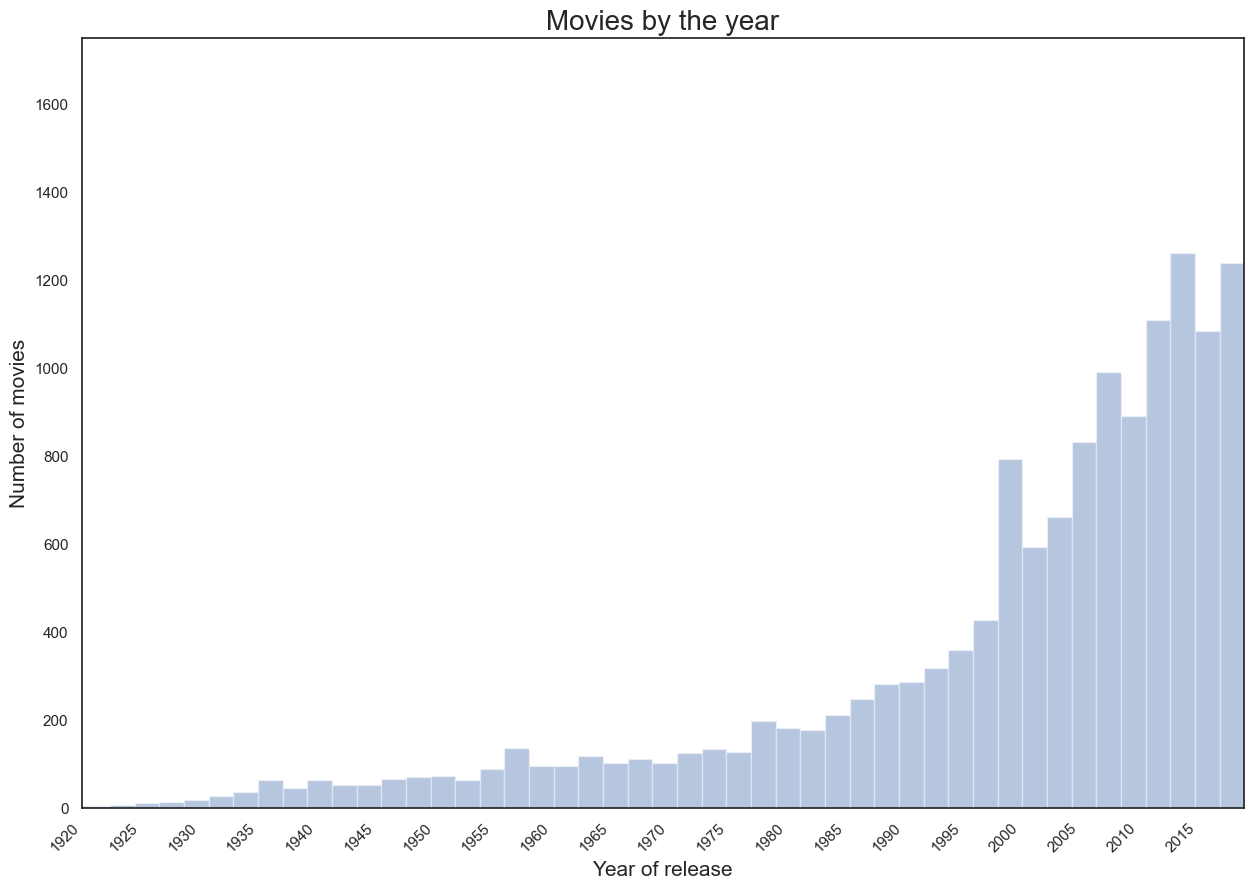

In [108]:
df = df[df.in_theaters_date.notnull()]
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'])
df['movie_year'] = df['in_theaters_date'].apply(lambda x: x.year)

sns.set(style="white")

plt.figure(figsize=(15,10))
plt.title('Movies by the year', size=20)
sns.distplot(df.movie_year, kde=False)
plt.ylabel('Number of movies', size=15)
plt.xlabel('Year of release',size=15)
plt.axis([1920, 2019, 0, 1750])
plt.xticks(np.arange(1920, 2018, step=5),rotation=45, ha='right')
plt.show()


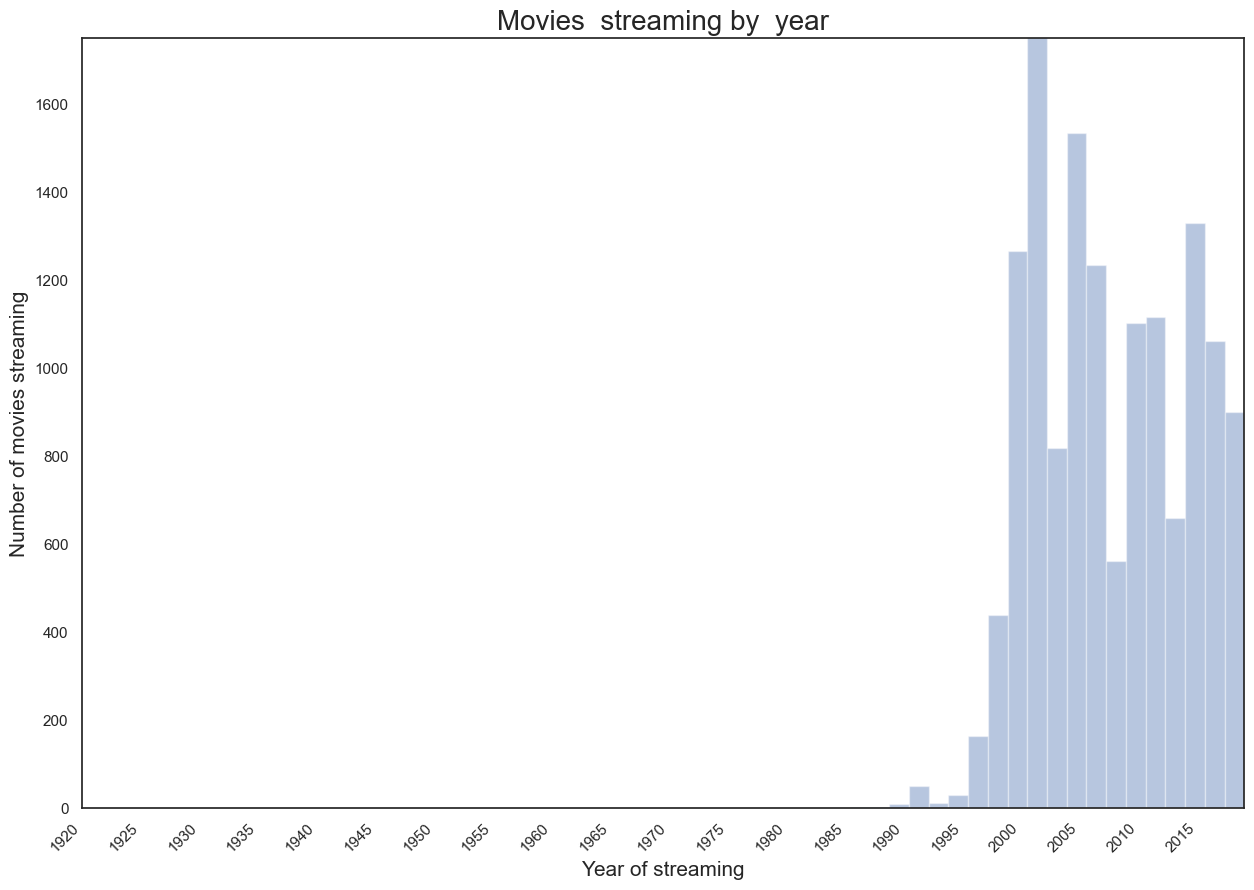

In [109]:
df = df[df.on_streaming_date.notnull()]
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'])
df['movie_year'] = df['on_streaming_date'].apply(lambda x: x.year)

sns.set(style="white")

plt.figure(figsize=(15,10))
plt.title('Movies  streaming by  year', size=20)
sns.distplot(df.movie_year, kde=False)
plt.ylabel('Number of movies streaming', size=15)
plt.xlabel('Year of streaming',size=15)
plt.axis([1920, 2019, 0, 1750])
plt.xticks(np.arange(1920, 2018, step=5),rotation=45, ha='right')
plt.show()


Distribution of TomatoMeter ratings across the years

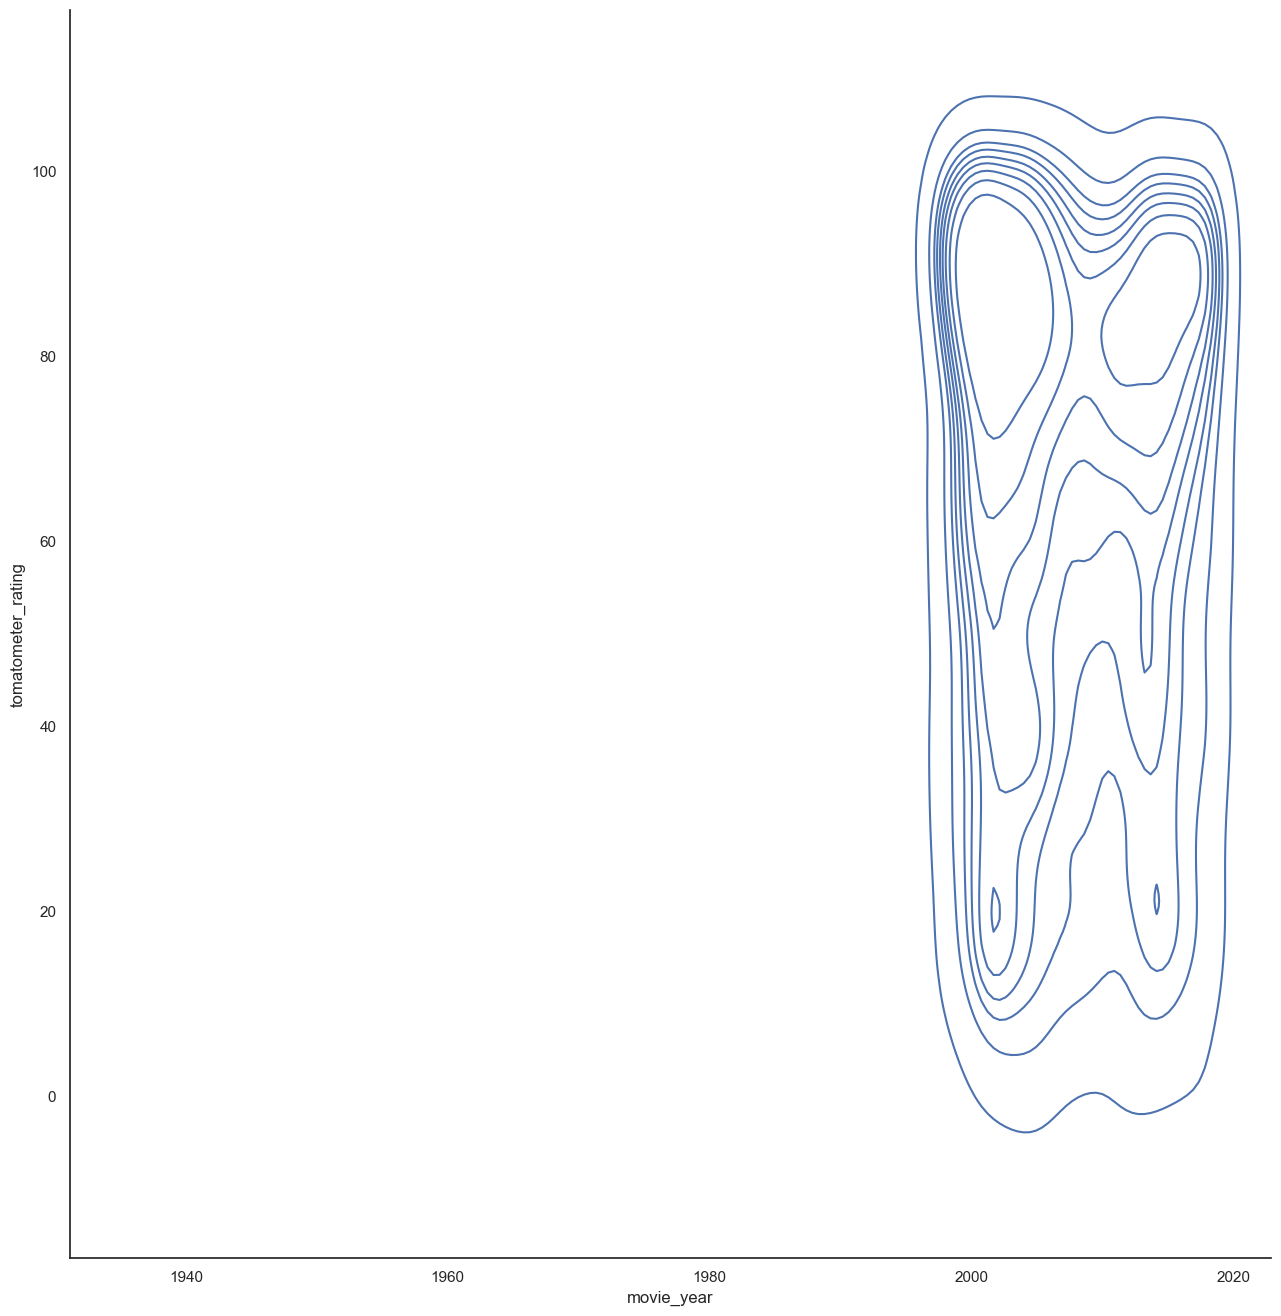

In [113]:
df = df[(df.tomatometer_rating.notnull()) &
                      (df.audience_rating.notnull())]
sns.displot(x=df['movie_year'], y=df['tomatometer_rating'],
              kind="kde").fig.set_size_inches(15,15)


Distribution of Audience ratings across the years

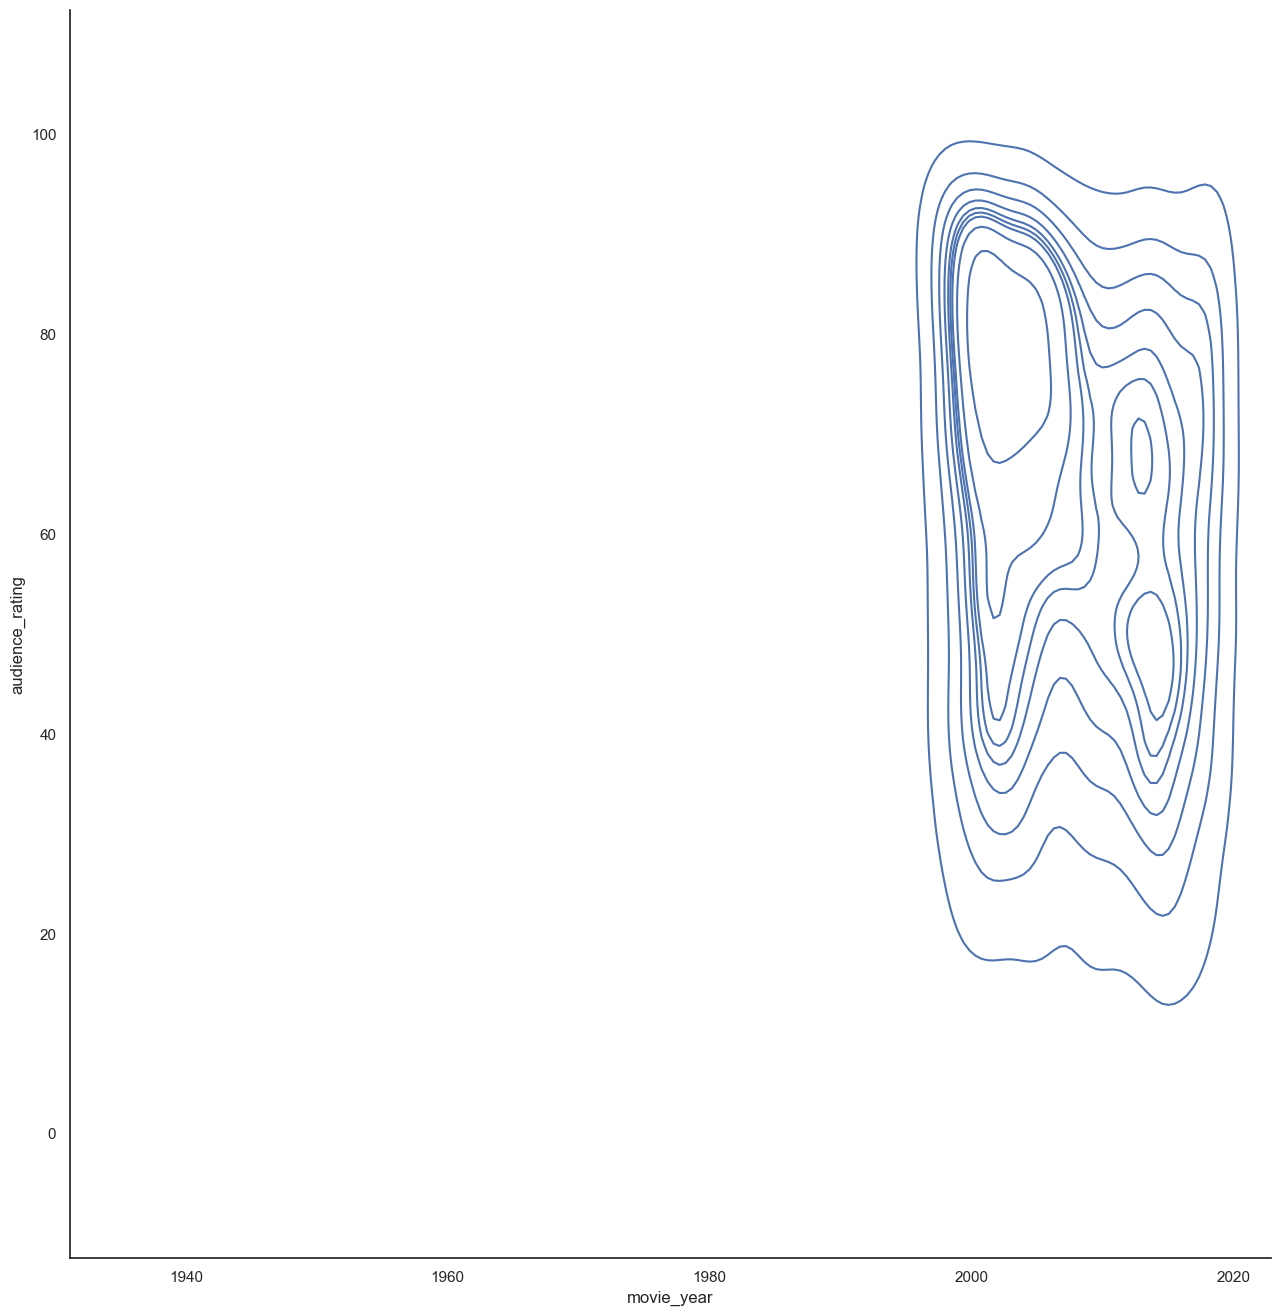

In [115]:
sns.displot(x=df['movie_year'], y=df['audience_rating'],
              kind="kde").fig.set_size_inches(15,15)

Frequency of Studio names

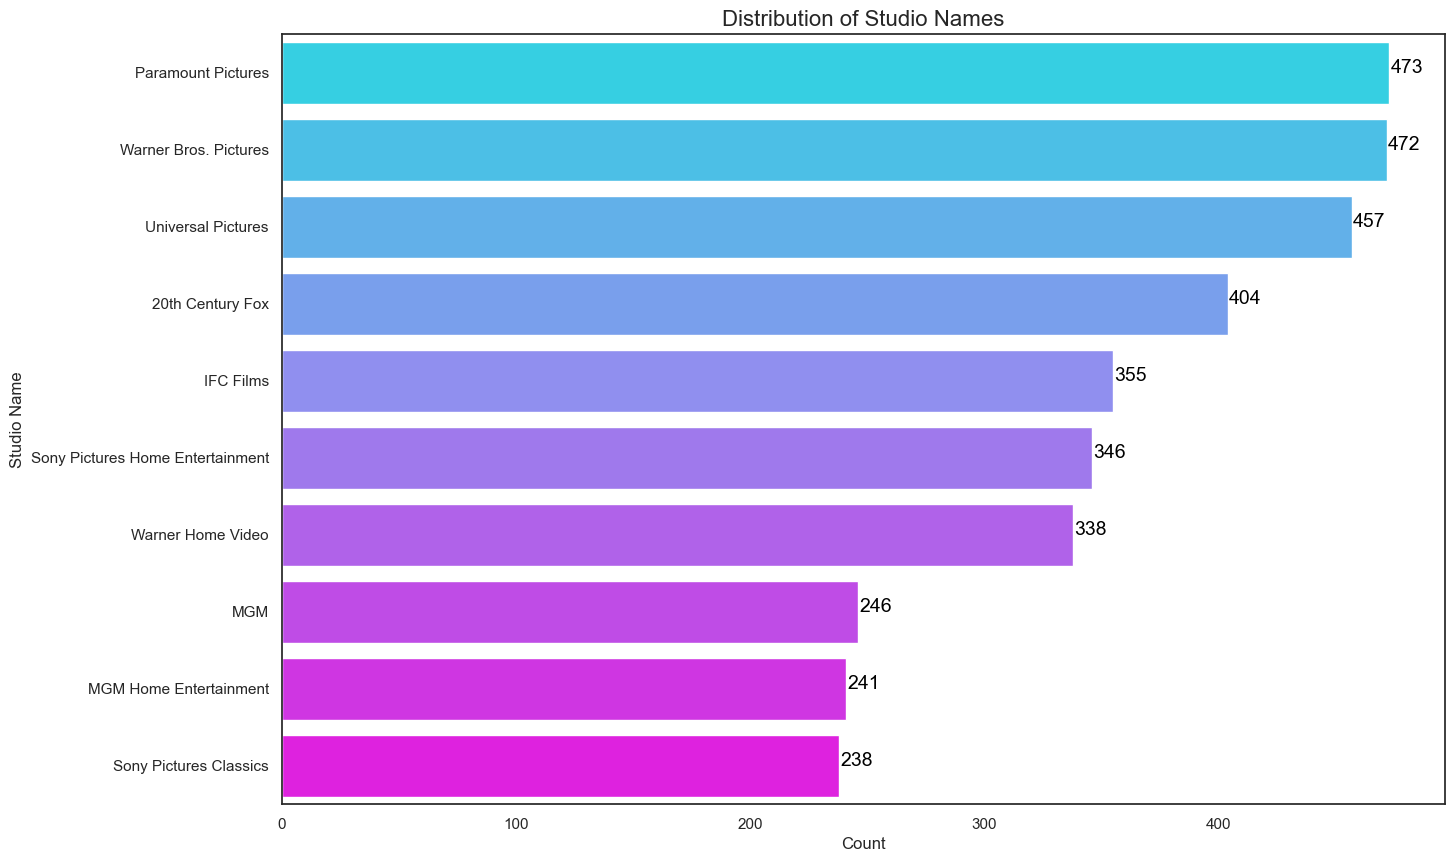

In [117]:
a = plt.cm.cool

plt.figure(figsize=(15, 10))
count = df['studio_name'].value_counts()[:10]
sns.barplot(x=count.values, y=count.index, palette=[a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7), a(0.8), a(0.9), a(0.99)])
for i, v in enumerate(count.values):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Studio Name', fontsize=12)
plt.title("Distribution of Studio Names", fontsize=16)
plt.show()

Distribution of TomatoMeter count per TomatoMeter status

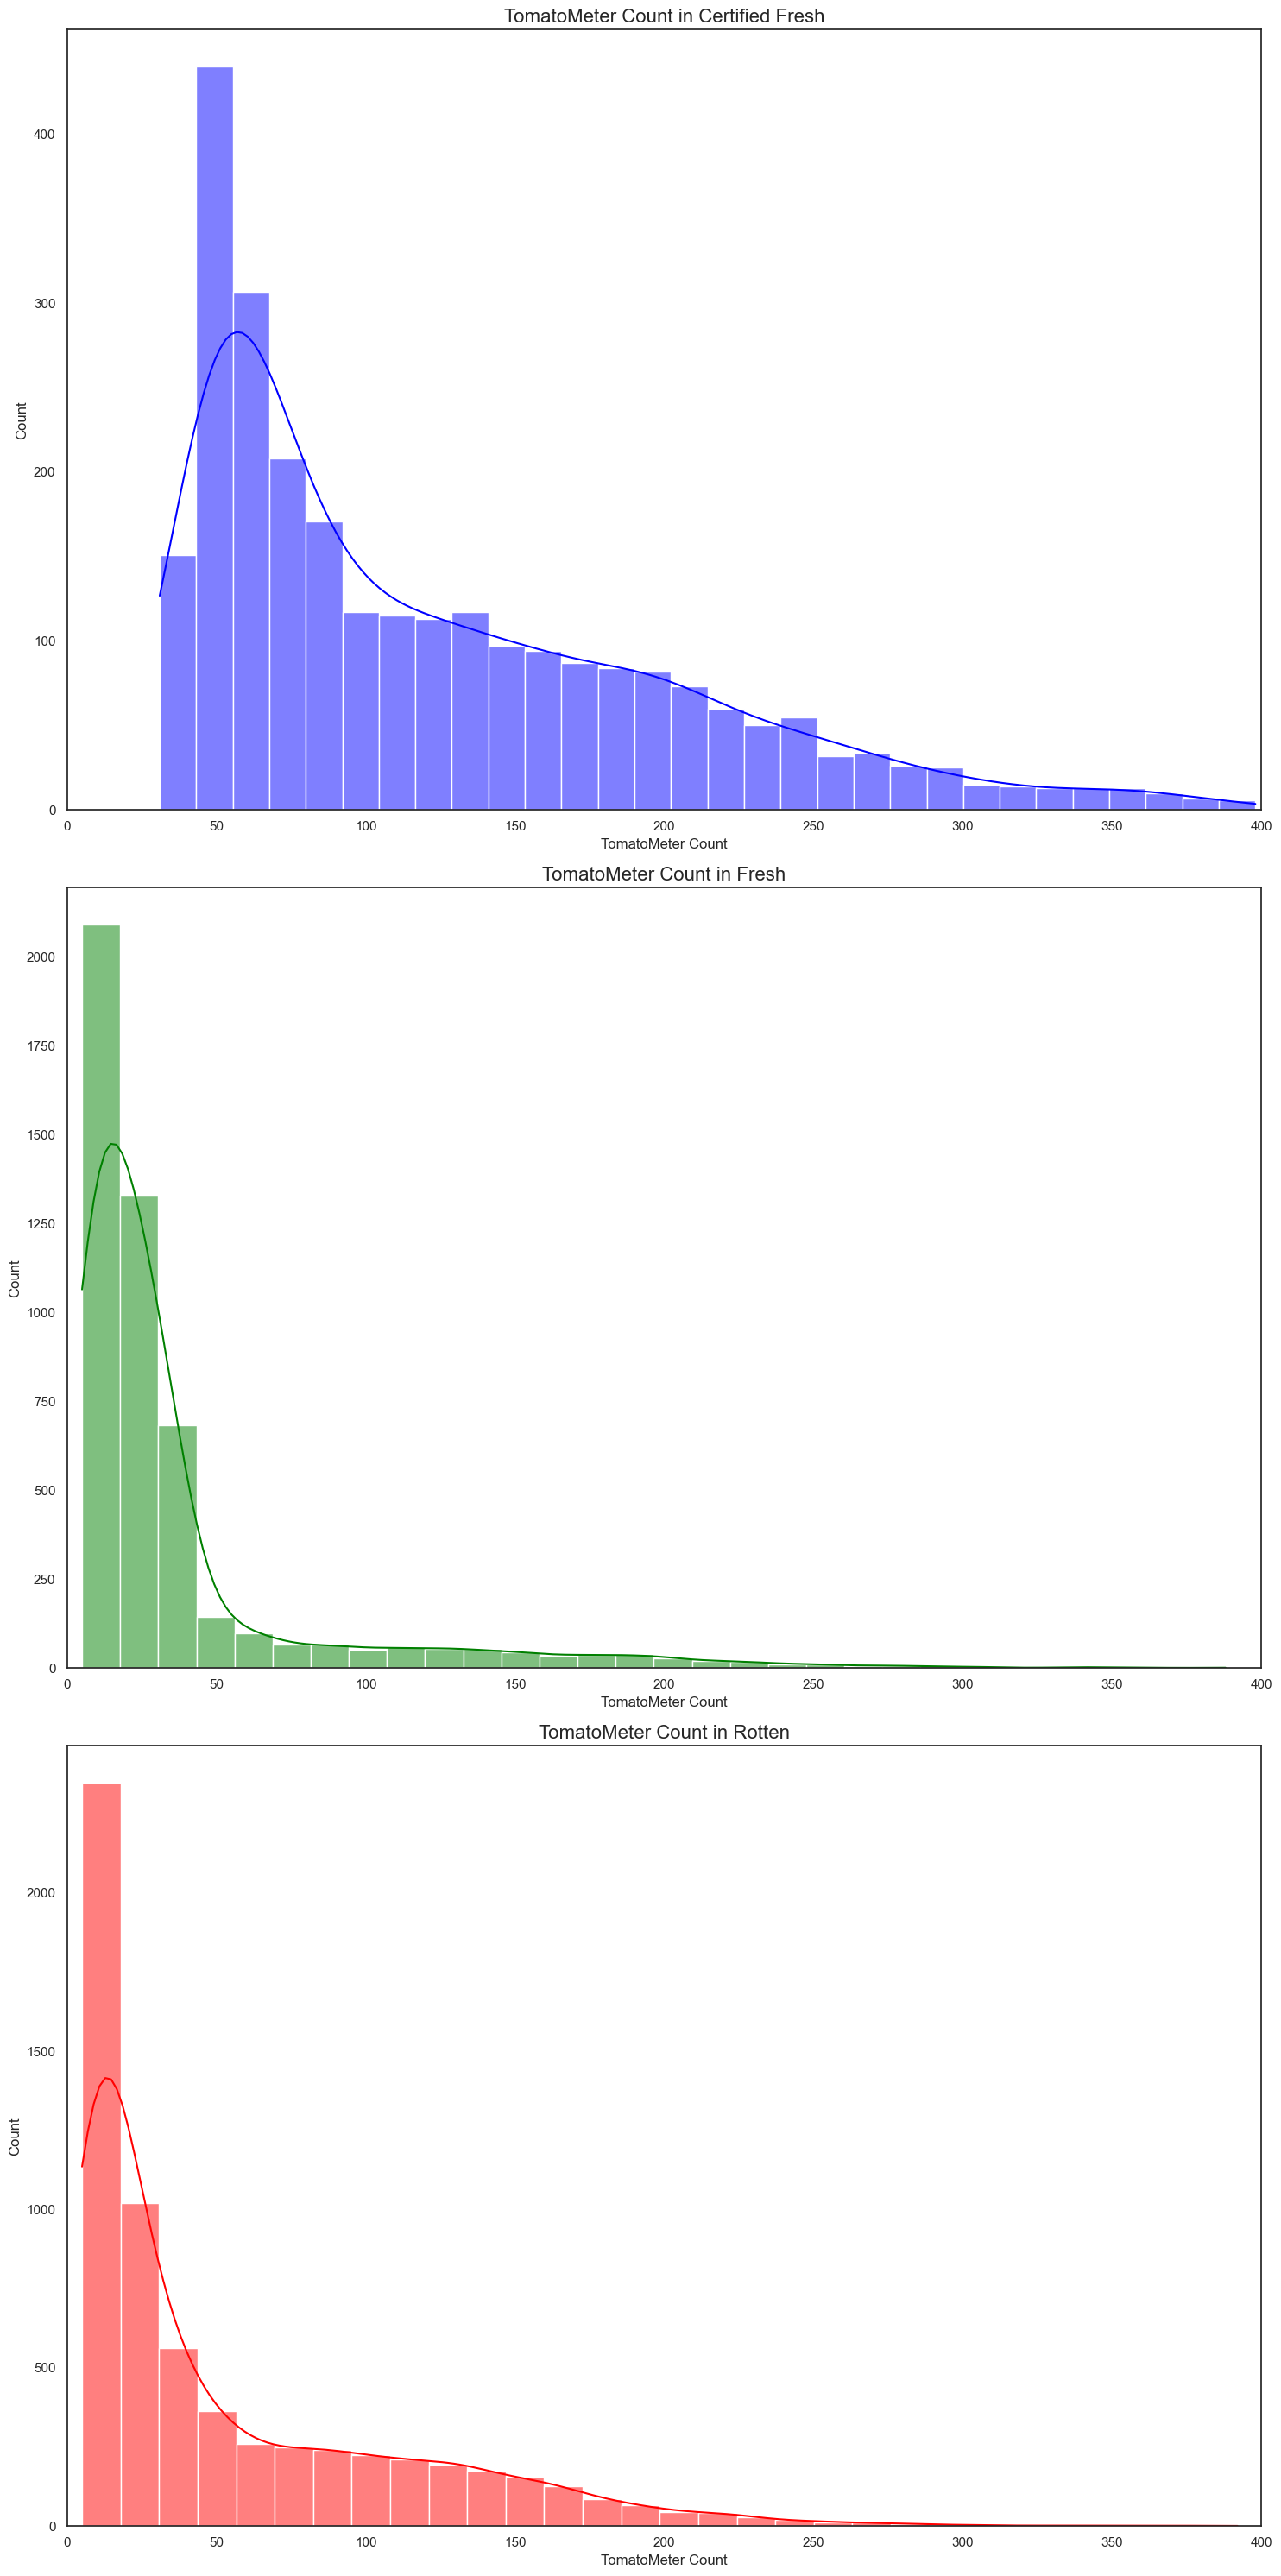

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(3, 1, figsize=(15, 30))


sns.histplot(
    df[(df['tomatometer_status'] == 'Certified Fresh') & 
       (df['tomatometer_count'] <= 400)]['tomatometer_count'], 
    ax=ax[0], bins=30, kde=True, color='blue'
)
ax[0].set_title('TomatoMeter Count in Certified Fresh', fontsize=16)
ax[0].set_xlabel("TomatoMeter Count", fontsize=12)
ax[0].set_xlim([0, 400])


sns.histplot(
   df[(df['tomatometer_status'] == 'Fresh') & 
                    (df['tomatometer_count'] <= 400)]['tomatometer_count'], 
    ax=ax[1], bins=30, kde=True, color='green'
)
ax[1].set_title('TomatoMeter Count in Fresh', fontsize=16)
ax[1].set_xlabel("TomatoMeter Count", fontsize=12)
ax[1].set_xlim([0, 400])

# Rotten distribution
sns.histplot(
    df[(df['tomatometer_status'] == 'Rotten') & 
                    (df['tomatometer_count'] <= 400)]['tomatometer_count'], 
    ax=ax[2], bins=30, kde=True, color='red'
)
ax[2].set_title('TomatoMeter Count in Rotten', fontsize=16)
ax[2].set_xlabel("TomatoMeter Count", fontsize=12)
ax[2].set_xlim([0, 400])


plt.tight_layout()
plt.show()


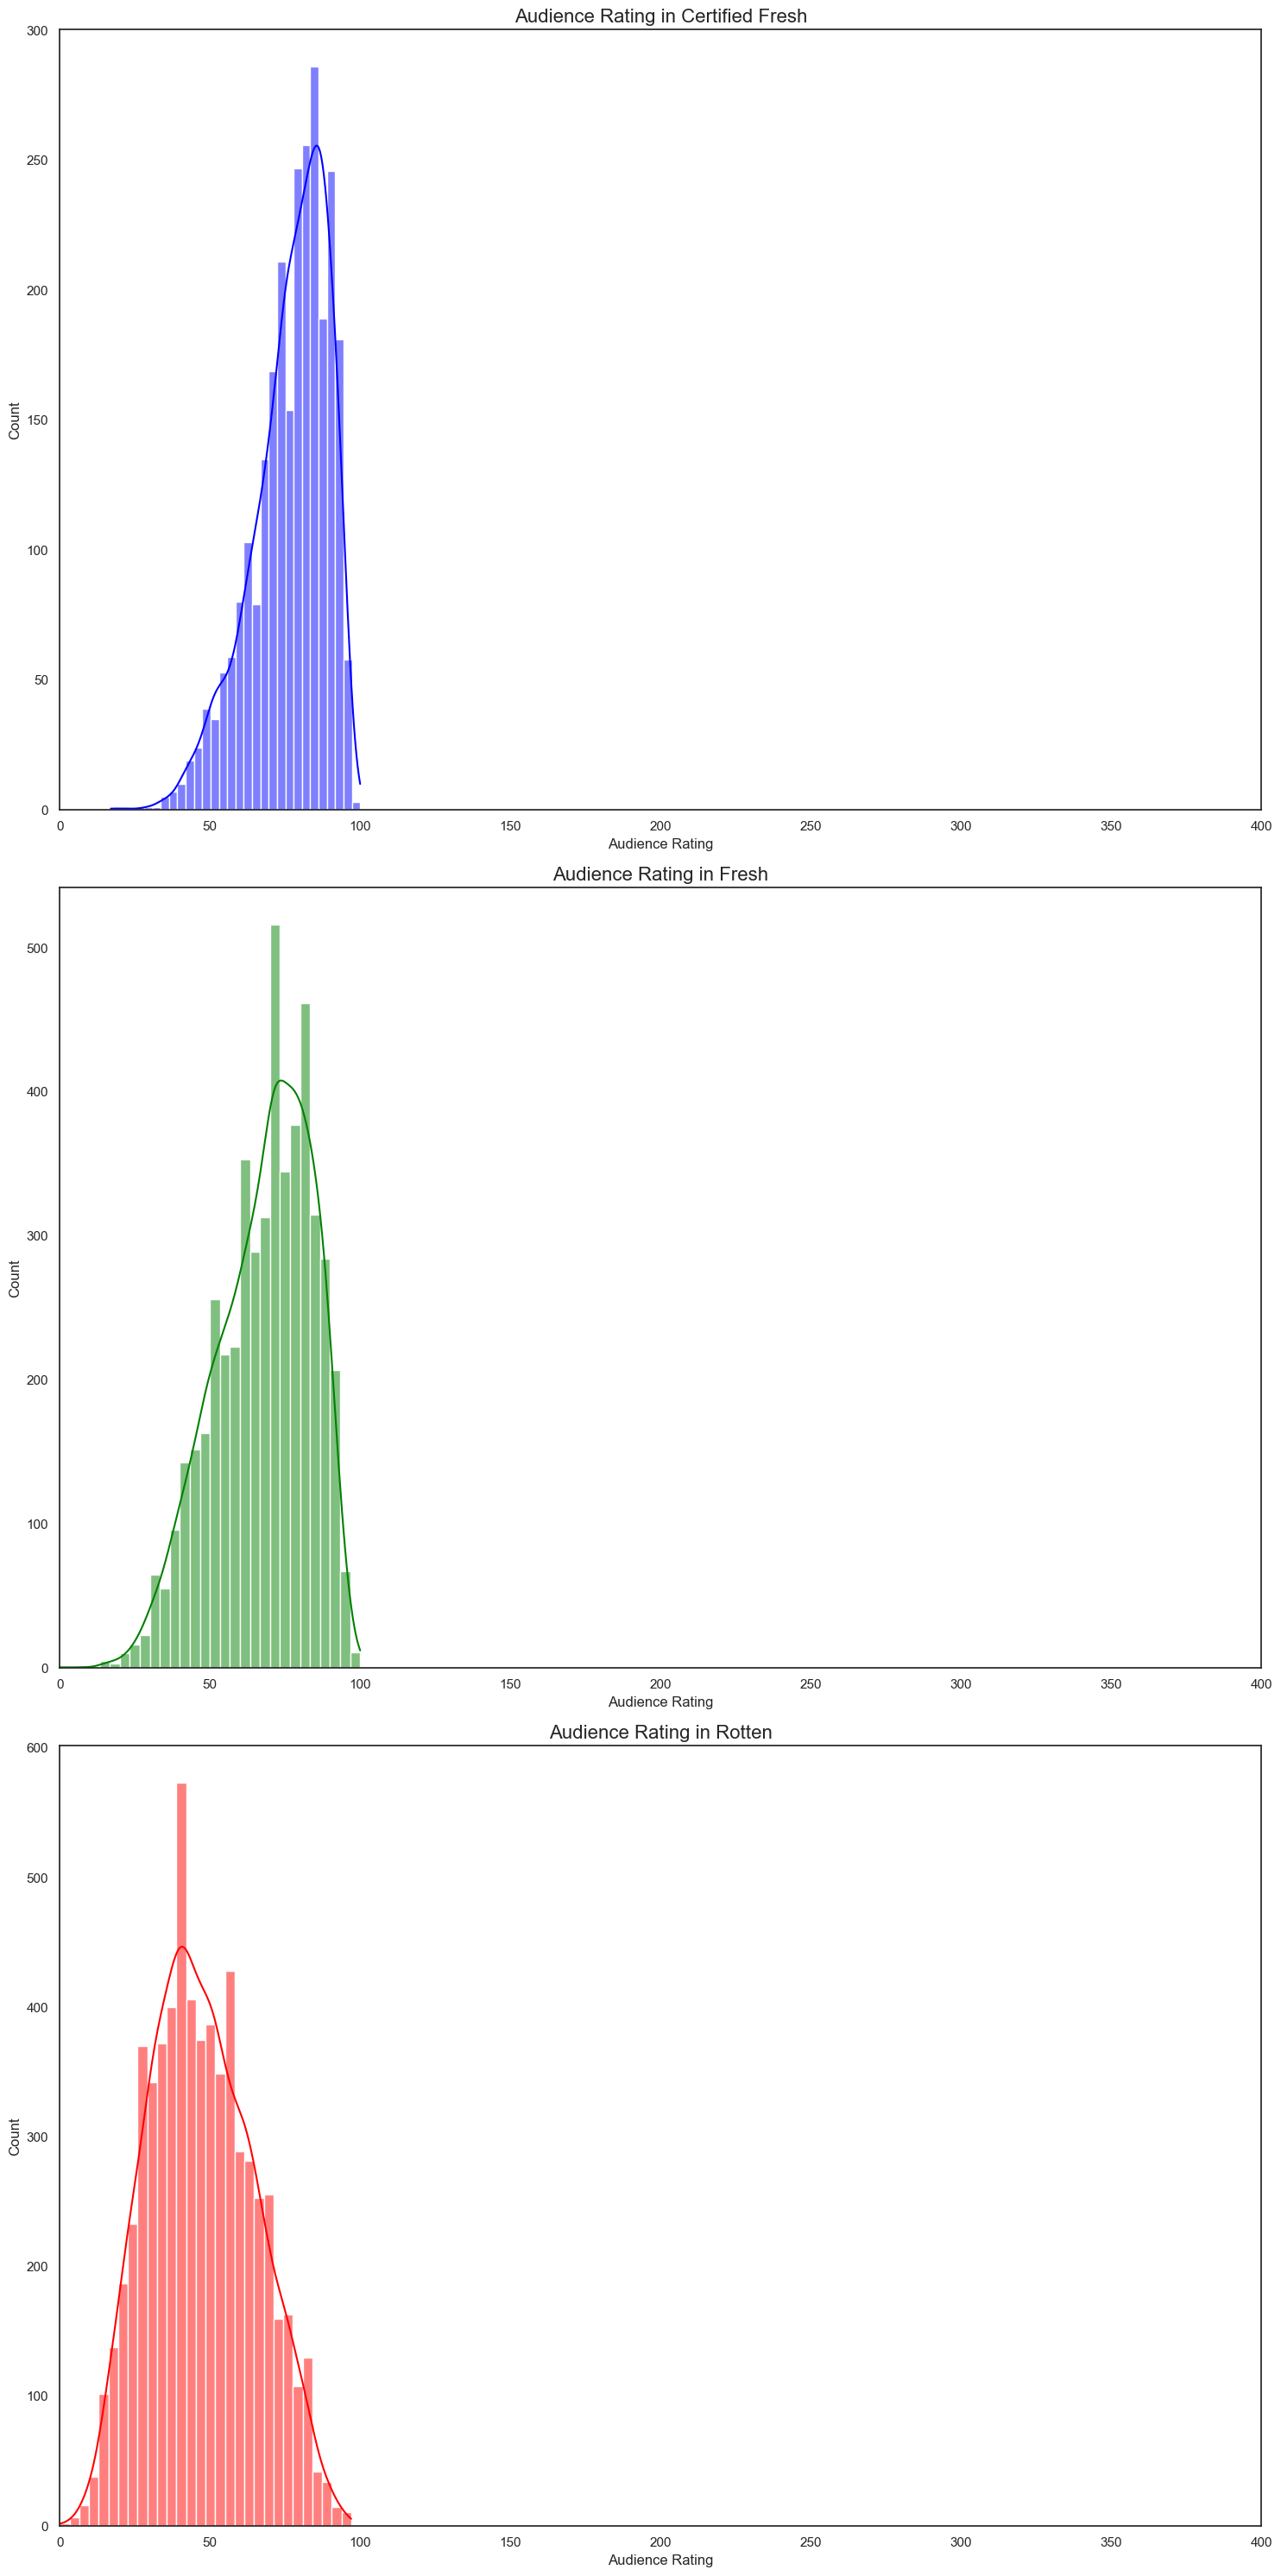

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(3, 1, figsize=(15, 30))

# Certified-Fresh distribution
sns.histplot(
    df[(df['tomatometer_status'] == 'Certified Fresh') & 
       (df['audience_rating'] <= 400)]['audience_rating'], 
    ax=ax[0], bins=30, kde=True, color='blue'
)
ax[0].set_title('Audience Rating in Certified Fresh', fontsize=16)
ax[0].set_xlabel("Audience Rating", fontsize=12)
ax[0].set_xlim([0, 400])

# Fresh distribution
sns.histplot(
    df[(df['tomatometer_status'] == 'Fresh') & 
       (df['audience_rating'] <= 400)]['audience_rating'], 
    ax=ax[1], bins=30, kde=True, color='green'
)
ax[1].set_title('Audience Rating in Fresh', fontsize=16)
ax[1].set_xlabel("Audience Rating", fontsize=12)
ax[1].set_xlim([0, 400])

# Rotten distribution
sns.histplot(
    df[(df['tomatometer_status'] == 'Rotten') & 
       (df['audience_rating'] <= 400)]['audience_rating'], 
    ax=ax[2], bins=30, kde=True, color='red'
)
ax[2].set_title('Audience Rating in Rotten', fontsize=16)
ax[2].set_xlabel("Audience Rating", fontsize=12)
ax[2].set_xlim([0, 400])

plt.tight_layout()
plt.show()


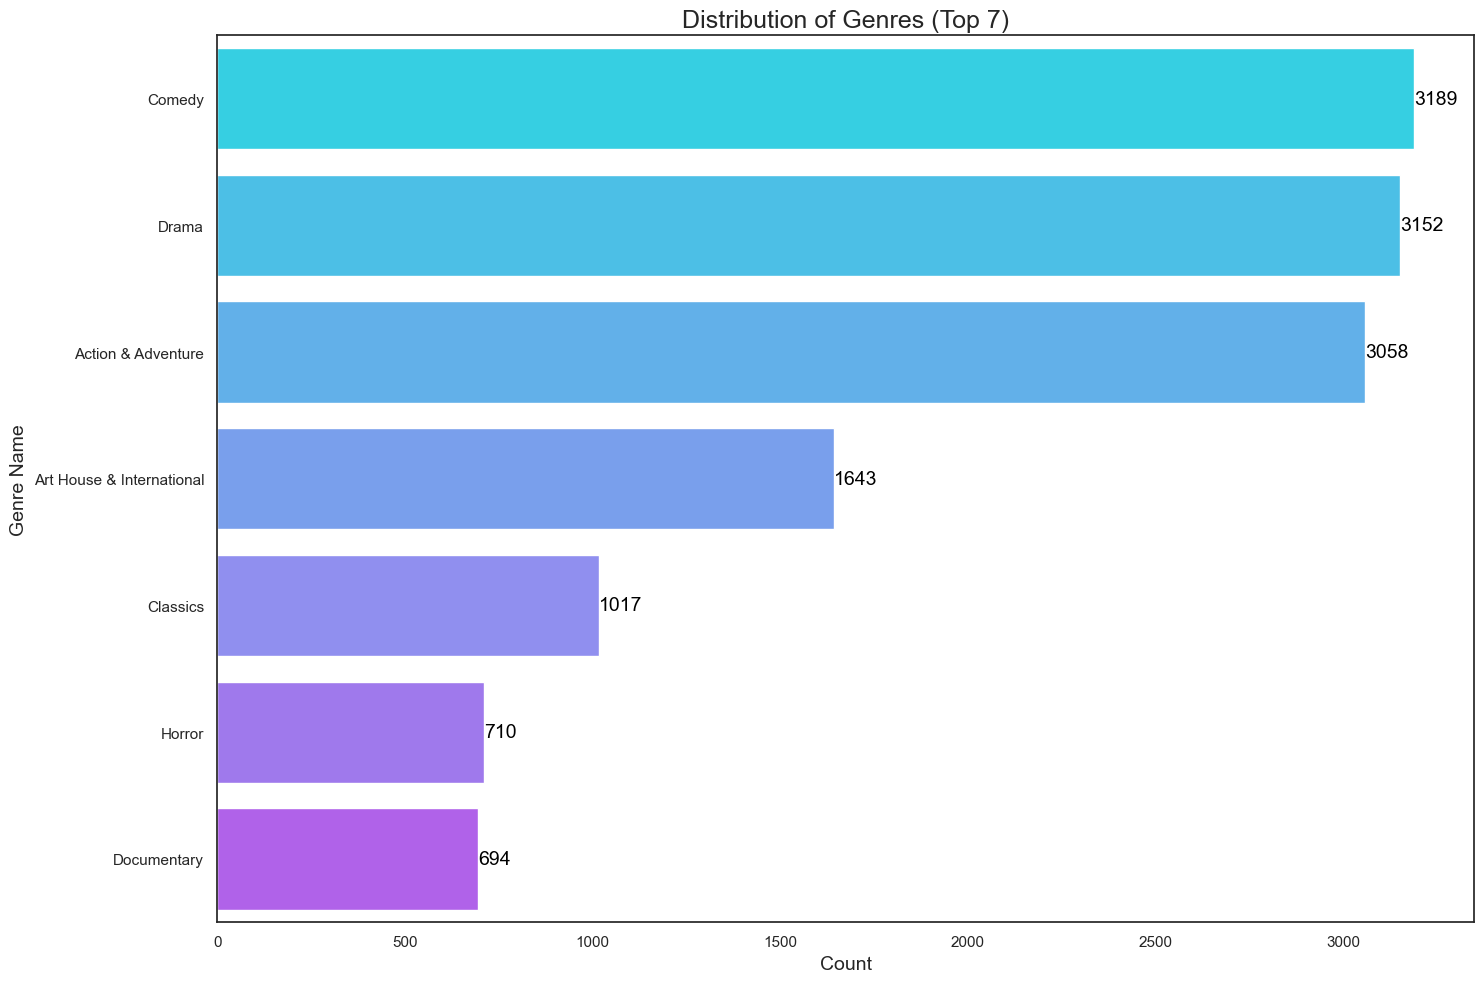

In [121]:
df['first_genre'] = df['genre'].str.split(',').str[0]
a = plt.cm.cool
plt.figure(figsize=(15, 10))
count = df['first_genre'].value_counts()[:7]
sns.barplot(x=count.values, y=count.index, palette=[a(0.1), a(0.2), a(0.3), a(0.4), a(0.5), a(0.6), a(0.7)])
for i, v in enumerate(count.values):
    plt.text(v + 1, i, str(v), color='black', fontsize=14, va='center')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre Name', fontsize=14)
plt.title('Distribution of Genres (Top 7)', fontsize=18)
plt.tight_layout()
plt.show()


In [122]:
genre_rating_tomatometer = pd.crosstab(df.first_genre, df.tomatometer_status, margins=True)
genre_rating_tomatometer.style.background_gradient(cmap='summer_r')

tomatometer_status,Certified Fresh,Fresh,Rotten,All
first_genre,,,,
Action & Adventure,496,930,1632,3058
Animation,92,76,119,287
Art House & International,421,794,428,1643
Classics,122,754,141,1017
Comedy,499,798,1892,3189
Cult Movies,1,6,10,17
Documentary,183,402,109,694
Drama,729,961,1462,3152
Horror,60,171,479,710


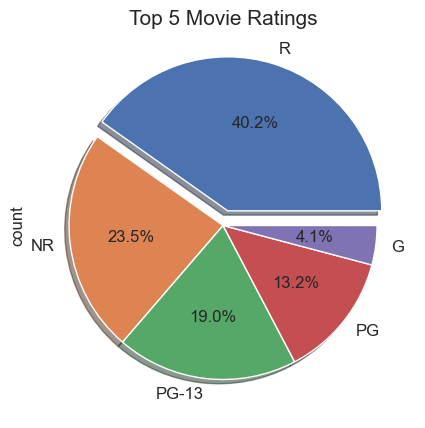

In [123]:
import matplotlib.pyplot as plt

rating = df['rating'].value_counts().sort_values(ascending=False).head(5)

explode = [0.1 if i == 0 else 0 for i in range(len(rating))]

# Plot the pie chart for the top 5 ratings
plt.figure(figsize=(8, 5))
rating.plot(
    kind="pie",
    explode=explode,
    fontsize=12,
    autopct='%1.1f%%',
    shadow=True
)

# Add title
plt.title("Top 5 Movie Ratings", fontsize=15)

# Save the figure before showing
plt.savefig("Top_5_Ratings", bbox_inches='tight')

# Display the plot
plt.show()


rating
R         5650
NR        3299
PG-13     2672
PG        1851
G          580
NC17        34
PG-13)       3
R)           1
Name: count, dtype: int64


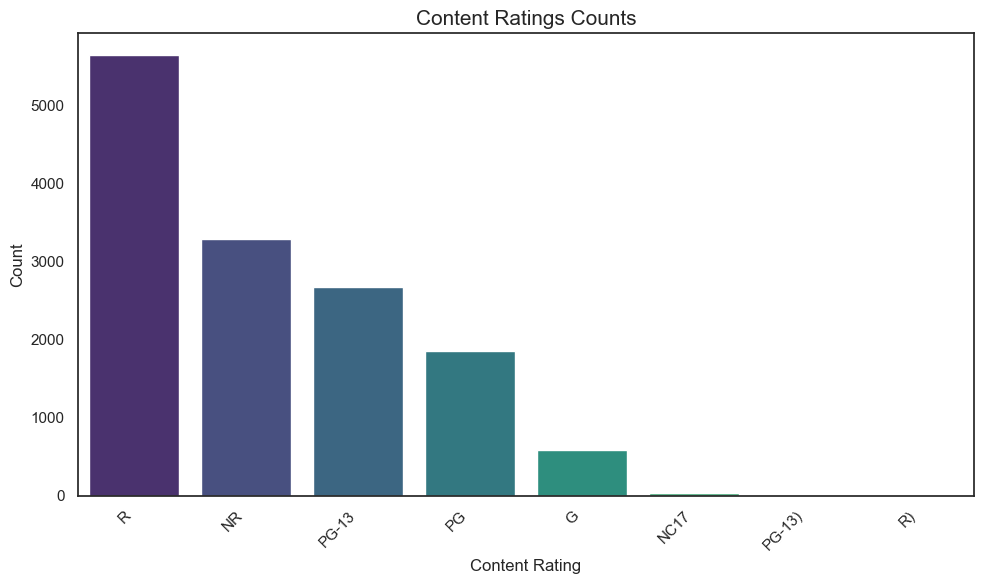

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['rating'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title('Content Ratings Counts', fontsize=15)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


tomatometer_status
Rotten             6468
Fresh              4969
Certified Fresh    2653
Name: count, dtype: int64


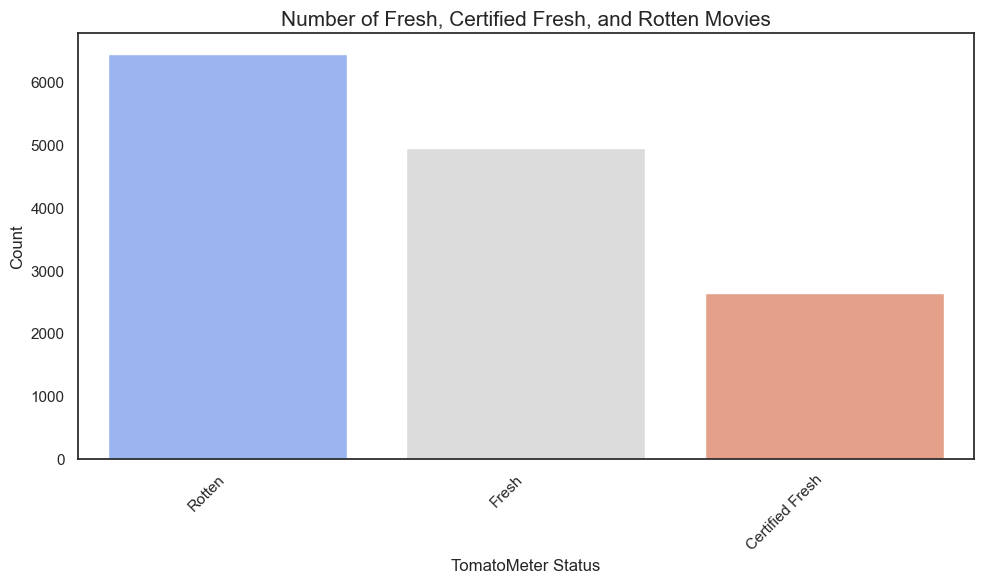

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df['tomatometer_status'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tomatometer_status', order=df['tomatometer_status'].value_counts().index, palette='coolwarm')
plt.title('Number of Fresh, Certified Fresh, and Rotten Movies', fontsize=15)
plt.xlabel('TomatoMeter Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [127]:
df['num_directors'] = df['directors'].apply(lambda x : len(x.split(',')))

df[df["num_directors"] == df["num_directors"].max()]

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,movie_year,first_genre,num_directors
10976,Paris Je T'aime,Twenty acclaimed filmmakers from around the wo...,R,"Art House & International, Drama, Romance","Christoffer Boe, Olivier Assayas, Fr√©d√©ric A...","Bruno Podalyd√®s, Paul Mayeda Berges, Gurinder...","Juliette Binoche, Steve Buscemi, Sergio Castel...",2007-05-04,2007-11-13,120.0,First Look Pictures,Certified Fresh,87,112,84.0,2007,Art House & International,22


In [128]:

df['num_authors'] = df['writers'].apply(lambda x : len(x.split(',')))
#Movie with the highest number of authors
df[df["num_authors"] == df["writers"].max()]

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,movie_year,first_genre,num_directors,num_authors


In [129]:
df

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,movie_year,first_genre,num_directors,num_authors
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,2010,Action & Adventure,1,1
1,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,2010,Comedy,1,1
2,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,1997,Comedy,1,1
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,2001,Classics,1,1
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,2003,Action & Adventure,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,Zoom,Former superhero Jack is called back to work t...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,2007-09-02,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0,2007,Action & Adventure,1,2
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0,2003,Drama,1,1
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,2016,Action & Adventure,3,2
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0,2001,Classics,2,2


In [130]:
df['cast'] = df['cast'].apply(lambda x : len(x.split(',')))
df[df["cast"] == df["cast"].max()]

,movie_title,movie_info,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,movie_year,first_genre,num_directors,num_authors
912,Malcolm X,Writer-director Spike Lee's epic portrayal of ...,PG-13,Drama,Spike Lee,"Spike Lee, Arnold Perl",306,1992-11-18,2000-01-18,201.0,Warner Bros.,Certified Fresh,88,57,91.0,2000,Drama,1,2


studio_name
Paramount Pictures                  473
Warner Bros. Pictures               472
Universal Pictures                  457
20th Century Fox                    404
IFC Films                           355
Sony Pictures Home Entertainment    346
Warner Home Video                   338
MGM                                 246
MGM Home Entertainment              241
Sony Pictures Classics              238
Name: count, dtype: int64


Text(0.5, 1.0, 'Audience Status Counts')

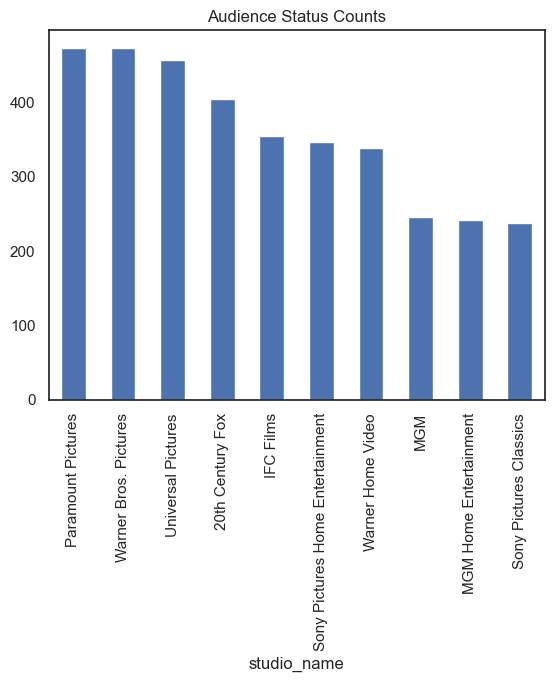

In [131]:
print(df['studio_name'].value_counts()[:10])
df['studio_name'].value_counts()[:10].plot(kind='bar')
plt.title('Audience Status Counts')

<Axes: >

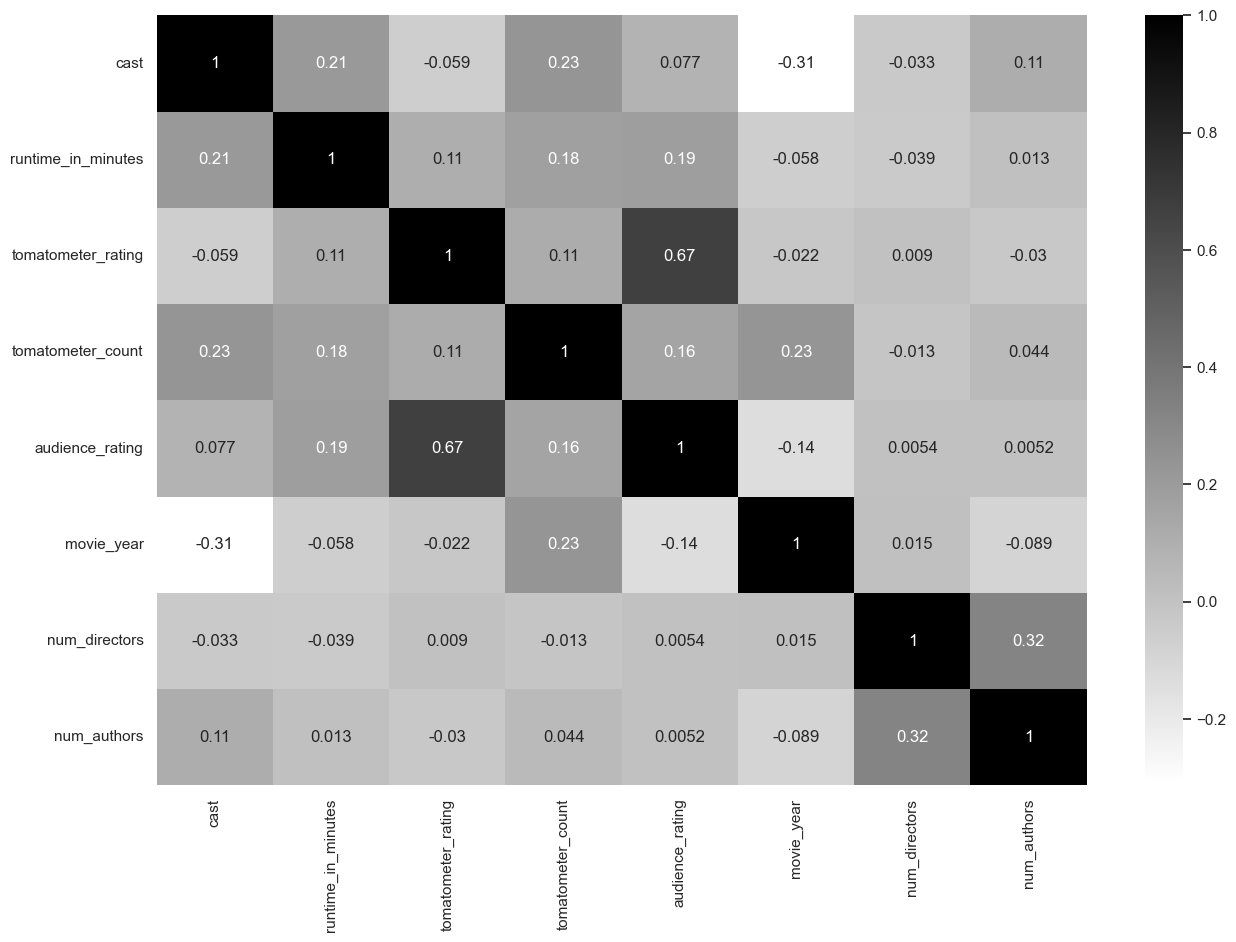

In [132]:
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='binary')

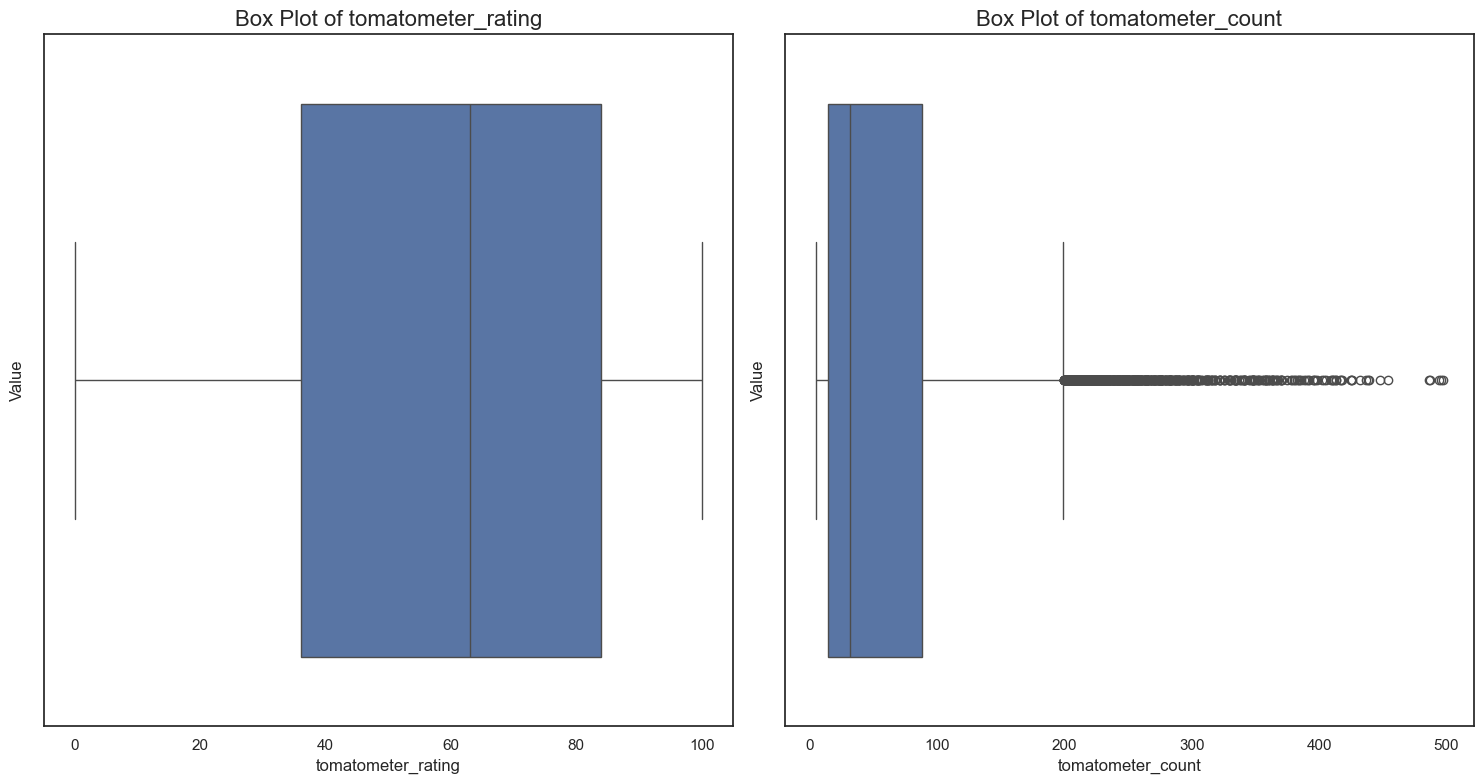

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
box_col = ['tomatometer_rating', 'tomatometer_count']
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  
for index, value in enumerate(box_col):
    sns.boxplot(data=df, x=value, ax=ax[index])
    ax[index].set_title(f'Box Plot of {value}', fontsize=16)
    ax[index].set_xlabel(value, fontsize=12)
    ax[index].set_ylabel('Value', fontsize=12)
plt.tight_layout()
plt.show()


In [134]:
mask1 = df['tomatometer_count'] < iqr(df['tomatometer_count']) * 1.5 + np.percentile(df['tomatometer_count'], 75)


In [135]:
df = df[mask1]

In [154]:
df.to_pickle('df.pkl')